In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [2]:
from google.colab import files
uploaded = files.upload()

Saving merged_data_cleaned.csv to merged_data_cleaned.csv


In [3]:
df = pd.read_csv('merged_data_cleaned.csv')

In [4]:
features = ['Rainfall', 'Temperature', 'Ph', 'Crop_encoded', 'NDVI', 'rainfall_mm', 'temp_C']
X = df[features]
y = df['Production']

In [5]:
# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [7]:
# Predictions
y_pred = model.predict(X_test)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE : {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²   : {r2:.4f}")


MAE : 0.0019
RMSE: 0.0330
R²   : 0.9991


In [8]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_
print("Best params:", grid_search.best_params_)

# Evaluate best model
best_pred = best_model.predict(X_test)
print(f"MAE : {mean_absolute_error(y_test, best_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, best_pred)):.4f}")
print(f"R²   : {r2_score(y_test, best_pred):.4f}")


Fitting 3 folds for each of 36 candidates, totalling 108 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
MAE : 0.0020
RMSE: 0.0338
R²   : 0.9991


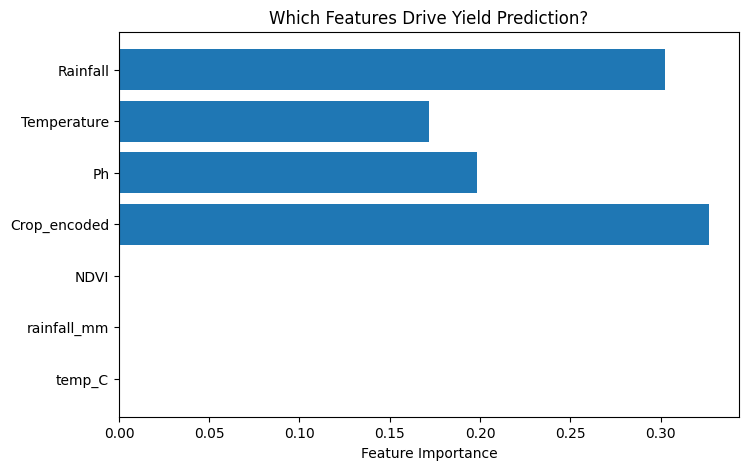

In [9]:
import matplotlib.pyplot as plt

importances = best_model.feature_importances_
feature_names = ['Rainfall', 'Temperature', 'Ph', 'Crop_encoded', 'NDVI', 'rainfall_mm', 'temp_C']

# Plot
plt.figure(figsize=(8,5))
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.title("Which Features Drive Yield Prediction?")
plt.gca().invert_yaxis()
plt.show()

In [10]:
import joblib
joblib.dump(best_model, "final_model.pkl")

['final_model.pkl']

In [11]:
files.download("final_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
!cp final_model.pkl /content/drive/MyDrive/